<a href="https://colab.research.google.com/github/indy1501/ML-and-Deep-Learning/blob/main/BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your credentials to the runtime

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

Colab includes the ``google.colab.data_table`` package that can be used to display large pandas dataframes as an interactive data table.
It can be enabled with:

In [ ]:
%load_ext google.colab.data_table

If you would prefer to return to the classic Pandas dataframe display, you can disable this by running:
```python
%unload_ext google.colab.data_table
```

Declare the Cloud project ID which will be used throughout this notebook

In [ ]:
project_id = 'bigqueryproject101'

In [ ]:
!gcloud config list

[component_manager]
disable_update_check = True
[compute]
gce_metadata_read_timeout_sec = 0
[core]
account = indrayani.bhalerao@sjsu.edu

Your active configuration is: [default]


In [ ]:
#!gcloud config set compute/region us-central1
#!gcloud config set compute/zone us-central1-a
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [ ]:
!gcloud config set project 'bigqueryproject101'

Updated property [core/project].


In [ ]:
!gcloud config list project

[core]
project = bigqueryproject101

Your active configuration is: [default]


# COVID-19 NYT Example

In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'bigqueryproject101'
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

# MLtest1
# census
# covid_demo
# dataproctest
# heartRateData
# iottest
# weatherData


In [ ]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.covid19_nyt.us_states`
ORDER BY
    date
"""
dfquery = client.query(sql)

In [ ]:
df_covid=dfquery.to_dataframe()
df_covid.head(200)

date  state_name state_fips_code  confirmed_cases  deaths
0    2020-01-21  Washington              53                1       0
1    2020-01-22  Washington              53                1       0
2    2020-01-23  Washington              53                1       0
3    2020-01-24    Illinois              17                1       0
4    2020-01-24  Washington              53                1       0
..          ...         ...             ...              ...     ...
195  2020-02-25     Arizona              04                1       0
196  2020-02-25    Illinois              17                2       0
197  2020-02-25    Nebraska              31               13       0
198  2020-02-25   Wisconsin              55                1       0
199  2020-02-25  California              06               11       0

[200 rows x 5 columns]

In [ ]:
df_covid.tail(200)

date                state_name  ... confirmed_cases  deaths
9769  2020-08-27                  Arkansas  ...           58745     739
9770  2020-08-27                  Colorado  ...           56706    1937
9771  2020-08-27                  Delaware  ...           16976     604
9772  2020-08-27                  Illinois  ...          229598    8206
9773  2020-08-27                  Kentucky  ...           48322     938
...          ...                       ...  ...             ...     ...
9964  2020-08-30            North Carolina  ...          166510    2721
9965  2020-08-30            South Carolina  ...          118324    2709
9966  2020-08-30            Virgin Islands  ...            1134      14
9967  2020-08-30      District of Columbia  ...           13959     606
9968  2020-08-30  Northern Mariana Islands  ...              56       2

[200 rows x 5 columns]

In [ ]:
is_California = df_covid['state_name']=='California'

In [ ]:
df_ca=df_covid[is_California]
df_ca.head()

date  state_name state_fips_code  confirmed_cases  deaths
6   2020-01-25  California              06                1       0
10  2020-01-26  California              06                2       0
14  2020-01-27  California              06                2       0
18  2020-01-28  California              06                2       0
22  2020-01-29  California              06                2       0

In [ ]:
df_ca.tail(30)

date  state_name state_fips_code  confirmed_cases  deaths
8355  2020-08-01  California              06           509507    9365
8410  2020-08-02  California              06           515937    9399
8465  2020-08-03  California              06           522235    9500
8520  2020-08-04  California              06           527258    9696
8575  2020-08-05  California              06           532776    9866
8630  2020-08-06  California              06           541013   10014
8685  2020-08-07  California              06           548142   10197
8740  2020-08-08  California              06           556158   10299
8795  2020-08-09  California              06           563244   10365
8850  2020-08-10  California              06           574267   10460
8905  2020-08-11  California              06           586078   10654
8960  2020-08-12  California              06           595097   10808
9015  2020-08-13  California              06           603212   10995
9070  2020-08-14  California              06           613243   11146
9125  2020-08-15  California              06           621981   11229
9180  2020-08-16  California              06           628508   11245
9235  2020-08-17  California              06           634991   11334
9290  2020-08-18  California              06           640499   11523
9345  2020-08-19  California              06           646742   11686
9400  2020-08-20  California              06           653401   11801
9455  2020-08-21  California              06           659991   11984
9510  2020-08-22  California              06           665325   12137
9565  2020-08-23  California              06           669944   12152
9620  2020-08-24  California              06           676236   12250
9675  2020-08-25  California              06           682320   12409
9730  2020-08-26  California              06           687612   12547
9785  2020-08-27  California              06           692962   12696
9840  2020-08-28  California              06           698389   12836
9895  2020-08-29  California              06           702499   12906
9950  2020-08-30  California              06           706589   12939

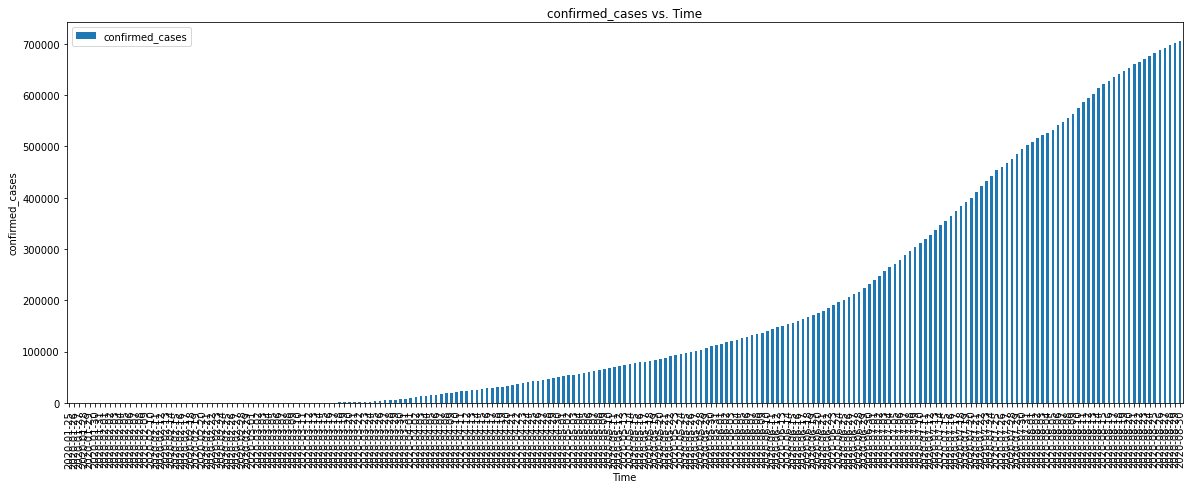

In [ ]:
#https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.DataFrame.plot.html
ax = df_ca.plot(kind='bar', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

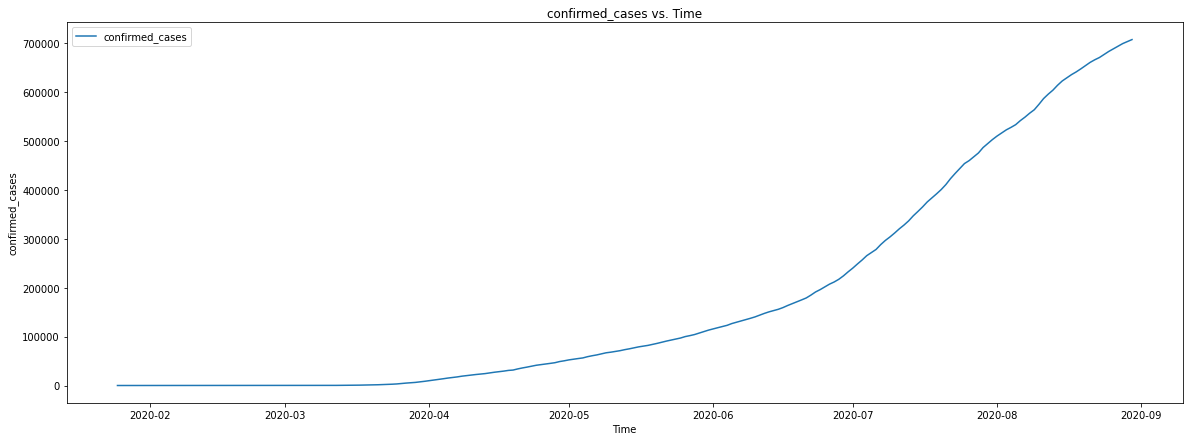

In [ ]:
ax = df_ca.plot(kind='line', x='date', y='confirmed_cases', figsize=(20,7))
ax.set_title('confirmed_cases vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('confirmed_cases');

In [ ]:
ax.figure.savefig("nytcovid_confirmed_cases.pdf")

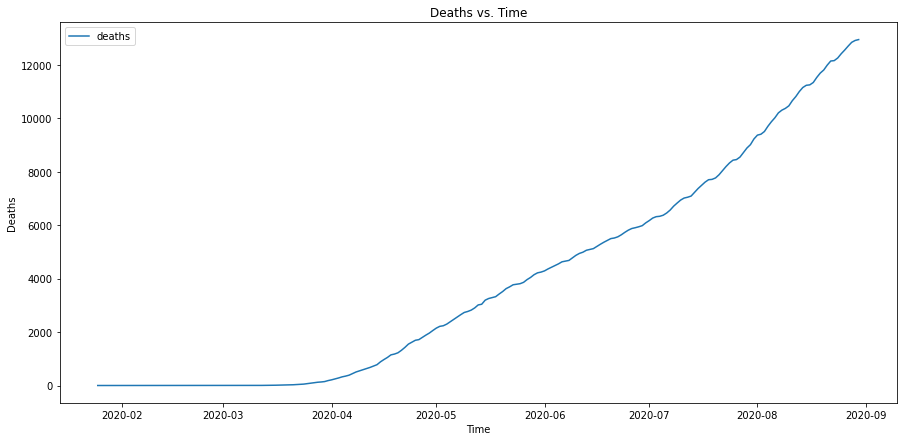

In [ ]:
ax = df_ca.plot(kind='line', x='date', y='deaths', figsize=(15,7))
ax.set_title('Deaths vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Deaths');
ax.figure.savefig("nytcovid_Deaths.pdf")

## Save Files and Connect to Google Drive
ref: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [ ]:
#Click download in Files section, or use the following command
from google.colab import files
files.download('nytcovid_Deaths.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pwd

/content


In [ ]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls ./drive/My\ Drive/Colab\ Notebooks/CMPE297Fall2020

Approach2.ipynb		     CMPE-MLIntro2.ipynb
CMPE-BigQuery-COVID19.ipynb  CMPE-MLIntro2New.ipynb
CMPE-IoTdata.ipynb	     nytcovid_confirmed_cases.pdf
CMPE-MLIntro1.ipynb	     Test.ipynb


In [ ]:
!cp ./nytcovid_confirmed_cases.pdf ./drive/My\ Drive/Colab\ Notebooks/CMPE297Fall2020

## Prediction

In [ ]:
! pip install fbprophet
#https://facebook.github.io/prophet/

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
# Set variables 
country = 'United States'
filter_case = 'confirmed_cases' #
period_to_forecast = 45

# Filter data
#df = df[df['location']==country]
df_ca.rename(columns={"date": "ds", filter_case: "y"},inplace=True) 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_ca['ds'] = pd.to_datetime(df_ca['ds'],infer_datetime_format=True)
df_ca = df_ca[df_ca['ds']>"2020-02-01"]
df_ca['y'] = df_ca['y'].astype(int)
df_ca = df_ca[['y','ds']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_ca

y         ds
39         6 2020-02-02
44         6 2020-02-03
49         6 2020-02-04
55         6 2020-02-05
61         6 2020-02-06
...      ...        ...
9290  640499 2020-08-18
9345  646742 2020-08-19
9400  653527 2020-08-20
9455  659991 2020-08-21
9510  665325 2020-08-22

[203 rows x 2 columns]

In [ ]:
# Run Prophet to get predictions
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df_ca)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [ ]:
forecast.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
258 2020-10-17  1.145174e+06  ...                         0.0  1.145161e+06
259 2020-10-18  1.153533e+06  ...                         0.0  1.153424e+06
260 2020-10-19  1.161892e+06  ...                         0.0  1.161705e+06
261 2020-10-20  1.170250e+06  ...                         0.0  1.170266e+06
262 2020-10-21  1.178609e+06  ...                         0.0  1.178705e+06

[5 rows x 16 columns]

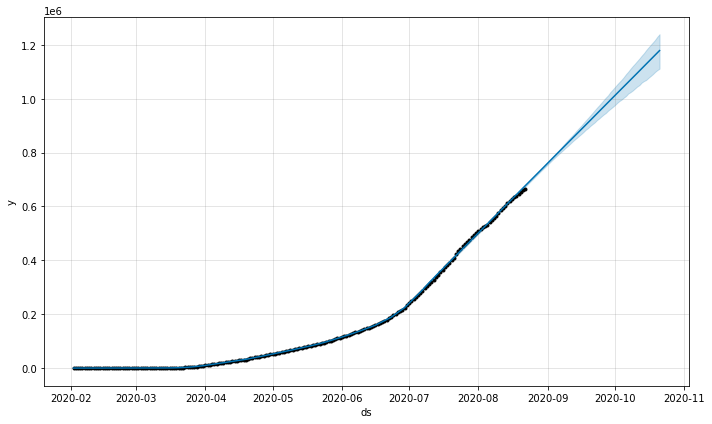

In [ ]:
#Plot the prediction Graph
graph = pred.plot(forecast)

In [ ]:
graph.savefig("Prophet_prediction.pdf")

In [ ]:
df_ca.to_csv('df_ca.csv', index=False)

# COVID-19 JHU Coronavirus COVID-19 Global Cases, by country
ref: https://console.cloud.google.com/marketplace/details/johnshopkins/covid19_jhu_global_cases?filter=solution-type%3Adataset&filter=category%3Acovid19&id=430e16bb-bd19-42dd-bb7a-d38386a9edf5

In [ ]:
from google.cloud import bigquery
project_id = 'cmpelkk'
client = bigquery.Client(project=project_id)


In [ ]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
  AND date = '2020-08-22'
ORDER BY
  confirmed desc
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

province_state country_region  ...         admin2                 combined_key
0        New York             US  ...  New York City  New York City, New York, US
1      California             US  ...    Los Angeles  Los Angeles, California, US
2         Florida             US  ...     Miami-Dade      Miami-Dade, Florida, US
3         Arizona             US  ...       Maricopa        Maricopa, Arizona, US
4        Illinois             US  ...           Cook           Cook, Illinois, US
..            ...            ...  ...            ...                          ...
95        Alabama             US  ...         Mobile          Mobile, Alabama, US
96       New York             US  ...         Orange         Orange, New York, US
97        Florida             US  ...        Collier         Collier, Florida, US
98      Louisiana             US  ...        Orleans       Orleans, Louisiana, US
99     New Jersey             US  ...          Ocean        Ocean, New Jersey, US

[100 rows x 13 columns]

In [ ]:
sql_covid19_jhu = """
SELECT
  *
FROM
  `bigquery-public-data.covid19_jhu_csse.summary` 
WHERE
  country_region = "US"
"""
dfquery_covid19_jhu = client.query(sql_covid19_jhu)
df_covid19=dfquery_covid19_jhu.to_dataframe()
df_covid19.head(100)

province_state  ... combined_key
0                                   Chicago, IL  ...         None
1                                    Boston, MA  ...         None
2                               Los Angeles, CA  ...         None
3                                    Orange, CA  ...         None
4                               Santa Clara, CA  ...         None
..                                          ...  ...          ...
95                                   Orange, CA  ...         None
96                              San Antonio, TX  ...         None
97                                  Seattle, WA  ...         None
98                                    Tempe, AZ  ...         None
99  Unassigned Location (From Diamond Princess)  ...         None

[100 rows x 13 columns]

In [ ]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468768 entries, 0 to 468767
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province_state  468768 non-null  object 
 1   country_region  468768 non-null  object 
 2   date            468768 non-null  object 
 3   latitude        459683 non-null  float64
 4   longitude       459683 non-null  float64
 5   location_geom   459683 non-null  object 
 6   confirmed       468768 non-null  int64  
 7   deaths          468738 non-null  float64
 8   recovered       468738 non-null  float64
 9   active          467127 non-null  float64
 10  fips            465194 non-null  object 
 11  admin2          466159 non-null  object 
 12  combined_key    467208 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 46.5+ MB


In [ ]:
import pandas as pd
#convert date variable to datetine object
df_covid19['date'] = pd.to_datetime(df_covid19['date'])
df_covid19.head(100)

province_state  ... combined_key
0                                   Chicago, IL  ...         None
1                                    Boston, MA  ...         None
2                               Los Angeles, CA  ...         None
3                                    Orange, CA  ...         None
4                               Santa Clara, CA  ...         None
..                                          ...  ...          ...
95                                   Orange, CA  ...         None
96                              San Antonio, TX  ...         None
97                                  Seattle, WA  ...         None
98                                    Tempe, AZ  ...         None
99  Unassigned Location (From Diamond Princess)  ...         None

[100 rows x 13 columns]

In [ ]:
df_covid19.describe()

latitude      longitude  ...     recovered        active
count  459683.000000  459683.000000  ...  4.687380e+05  4.671270e+05
mean       38.107820     -91.235697  ...  2.132787e+02  4.811113e+02
std         5.521035      14.331455  ...  1.585553e+04  1.917093e+04
min       -14.271000    -174.159600  ...  0.000000e+00 -2.477656e+06
25%        34.485570     -97.427606  ...  0.000000e+00  5.000000e+00
50%        38.181087     -89.528305  ...  0.000000e+00  4.400000e+01
75%        41.659439     -83.040785  ...  0.000000e+00  2.380000e+02
max        69.314792     145.673900  ...  1.985484e+06  2.251250e+05

[8 rows x 6 columns]

In [ ]:
df_covid19.isnull().sum()

province_state       0
country_region       0
date                 0
latitude          9085
longitude         9085
location_geom     9085
confirmed            0
deaths              30
recovered           30
active            1641
fips              3574
admin2            2609
combined_key      1560
dtype: int64

In [ ]:
import numpy as np
df_covid19['latitude'] = df_covid19['latitude'].replace(np.nan,'nan')
df_covid19['longitude'] = df_covid19['longitude'].replace(np.nan,'nan')
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,'nan')

In [ ]:
df_covid19['deaths'] = df_covid19['deaths'].replace(np.nan,0)
df_covid19['deaths'] = df_covid19['deaths'].replace('nan',0)
df_covid19['deaths'] = df_covid19['deaths'].replace('NaN',0)

In [ ]:
df_covid19.isnull().sum()

province_state       0
country_region       0
date                 0
latitude             0
longitude            0
location_geom     9085
confirmed            0
deaths               0
recovered           30
active            1641
fips              3574
admin2            2609
combined_key      1560
dtype: int64

In [ ]:
#df_covid19 = df_covid19.sort_values(by=['province_state','date'])
df_covid19 = df_covid19.sort_values(by=['date', 'province_state'])
df_covid19.tail(100)

province_state country_region  ...      admin2                   combined_key
443293  West Virginia             US  ...        Wood        Wood, West Virginia, US
443442  West Virginia             US  ...     Wyoming     Wyoming, West Virginia, US
468302  West Virginia             US  ...  Unassigned  Unassigned, West Virginia, US
443593      Wisconsin             US  ...       Adams           Adams, Wisconsin, US
443746      Wisconsin             US  ...     Ashland         Ashland, Wisconsin, US
...               ...            ...  ...         ...                            ...
457213        Wyoming             US  ...       Teton             Teton, Wyoming, US
457368        Wyoming             US  ...       Uinta             Uinta, Wyoming, US
457521        Wyoming             US  ...    Washakie          Washakie, Wyoming, US
457640        Wyoming             US  ...      Weston            Weston, Wyoming, US
468580        Wyoming             US  ...  Unassigned        Unassigned, Wyoming, US

[100 rows x 13 columns]

In [ ]:
first_day = min(df_covid19['date'])
last_day = max(df_covid19['date'])
print('First day {}, Last day {}, Number of days {}'.format(first_day, last_day, (last_day - first_day).days + 1))

First day 2020-01-22 00:00:00, Last day 2020-08-22 00:00:00, Number of days 214


In [ ]:
ddd=df_covid19.groupby('date')[['confirmed','deaths']]
ddd.sum()

confirmed    deaths
date                           
2020-01-22          1       0.0
2020-01-23          1       0.0
2020-01-24          2       0.0
2020-01-25          2       0.0
2020-01-26          5       0.0
...               ...       ...
2020-08-18    5483388  171821.0
2020-08-19    5529824  173177.0
2020-08-20    5573847  174255.0
2020-08-21    5622540  175370.0
2020-08-22    5667112  176353.0

[214 rows x 2 columns]

In [ ]:
info_us = pd.DataFrame(ddd.sum()).reset_index().sort_values(by='date')
info_us.tail(10)

date  confirmed    deaths
204 2020-08-13    5248958  167110.0
205 2020-08-14    5313252  168452.0
206 2020-08-15    5361165  169481.0
207 2020-08-16    5403213  170052.0
208 2020-08-17    5438325  170497.0
209 2020-08-18    5483388  171821.0
210 2020-08-19    5529824  173177.0
211 2020-08-20    5573847  174255.0
212 2020-08-21    5622540  175370.0
213 2020-08-22    5667112  176353.0

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

# Create figure with secondary y-axis, ref: https://plotly.com/python/multiple-axes/
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.confirmed, name='Confirmed Cases', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=info_us.date, y=info_us.deaths, name='Fatalities', line=dict(color='purple')), secondary_y=True)

fig.update_yaxes(title_text="Confirmed Cases", secondary_y=False)
fig.update_yaxes(title_text="Fatalities", secondary_y=True)
fig.update_layout(title_text='Confirmed Cases and Fatalities', title_x=0.5)
fig.show()
#fig.write_image("images/fig1.pdf")
#fig.write_image("images/fig1.svg")

## Confirmed cases map view

In [ ]:
df_country = df_covid19[df_covid19['date'] == max(df_covid19['date'])].copy()
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="confirmed",
                     projection="natural earth")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Confirmed Cases - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

In [ ]:
fig = px.scatter_geo(df_country,
                     lat='latitude', lon='longitude', color="country_region",
                     hover_name="country_region", size="deaths",
                     projection="natural earth")#,animation_frame="date")
fig.update_geos(scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(title='US Fatalities - {}'.format(max(df_covid19['date'])), title_x=0.5)
fig.show()

## Top 10 states - Confirmed Cases

In [ ]:
print(last_day)
topStateConfCases = pd.DataFrame(df_covid19[df_covid19['date'] == last_day].groupby(['province_state'])['confirmed'].sum()).reset_index().sort_values(by='confirmed', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values

2020-08-22 00:00:00


In [ ]:
topStateConfCases

array(['California', 'Florida', 'Texas', 'New York', 'Georgia',
       'Illinois', 'Arizona', 'New Jersey', 'North Carolina', 'Tennessee',
       'Louisiana'], dtype=object)

In [ ]:
fig = go.Figure()
for state in topStateConfCases:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['confirmed'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.confirmed, name=state))
fig.update_layout(title_text='Confirmed Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - New Cases

In [ ]:
df_confCases = pd.DataFrame(df_covid19.groupby(['date','province_state'])['confirmed'].sum()).reset_index().sort_values(by=['province_state','date'])
df_confCases.tail(30)

date   province_state  confirmed
9049  2020-07-28          Wyoming       2589
9107  2020-07-29          Wyoming       2628
9165  2020-07-30          Wyoming       2686
9223  2020-07-31          Wyoming       2726
9281  2020-08-01          Wyoming       2769
9339  2020-08-02          Wyoming       2808
9397  2020-08-03          Wyoming       2848
9455  2020-08-04          Wyoming       2884
9513  2020-08-05          Wyoming       2923
9571  2020-08-06          Wyoming       2953
9629  2020-08-07          Wyoming       3000
9687  2020-08-08          Wyoming       3015
9745  2020-08-09          Wyoming       3050
9803  2020-08-10          Wyoming       3042
9861  2020-08-11          Wyoming       3073
9919  2020-08-12          Wyoming       3086
9977  2020-08-13          Wyoming       3119
10035 2020-08-14          Wyoming       3183
10093 2020-08-15          Wyoming       3227
10151 2020-08-16          Wyoming       3286
10209 2020-08-17          Wyoming       3331
10267 2020-08-18          Wyoming       3360
10325 2020-08-19          Wyoming       3431
10383 2020-08-20          Wyoming       3457
10441 2020-08-21          Wyoming       3524
10499 2020-08-22          Wyoming       3543
594   2020-03-06  Yolo County, CA          1
676   2020-03-07  Yolo County, CA          1
782   2020-03-08  Yolo County, CA          1
898   2020-03-09  Yolo County, CA          1

In [ ]:
for state in df_confCases['province_state'].unique():
    confirmdf=df_confCases.loc[df_confCases['province_state'] == state,'confirmed'] # select state
    newconfirmdf=np.diff(confirmdf) # new cases
    df_confCases.loc[df_confCases['province_state'] == state, 'NewCases'] = np.append(0, newconfirmdf)
df_confCases.tail(30)

date   province_state  confirmed  NewCases
9049  2020-07-28          Wyoming       2589      69.0
9107  2020-07-29          Wyoming       2628      39.0
9165  2020-07-30          Wyoming       2686      58.0
9223  2020-07-31          Wyoming       2726      40.0
9281  2020-08-01          Wyoming       2769      43.0
9339  2020-08-02          Wyoming       2808      39.0
9397  2020-08-03          Wyoming       2848      40.0
9455  2020-08-04          Wyoming       2884      36.0
9513  2020-08-05          Wyoming       2923      39.0
9571  2020-08-06          Wyoming       2953      30.0
9629  2020-08-07          Wyoming       3000      47.0
9687  2020-08-08          Wyoming       3015      15.0
9745  2020-08-09          Wyoming       3050      35.0
9803  2020-08-10          Wyoming       3042      -8.0
9861  2020-08-11          Wyoming       3073      31.0
9919  2020-08-12          Wyoming       3086      13.0
9977  2020-08-13          Wyoming       3119      33.0
10035 2020-08-14          Wyoming       3183      64.0
10093 2020-08-15          Wyoming       3227      44.0
10151 2020-08-16          Wyoming       3286      59.0
10209 2020-08-17          Wyoming       3331      45.0
10267 2020-08-18          Wyoming       3360      29.0
10325 2020-08-19          Wyoming       3431      71.0
10383 2020-08-20          Wyoming       3457      26.0
10441 2020-08-21          Wyoming       3524      67.0
10499 2020-08-22          Wyoming       3543      19.0
594   2020-03-06  Yolo County, CA          1       0.0
676   2020-03-07  Yolo County, CA          1       0.0
782   2020-03-08  Yolo County, CA          1       0.0
898   2020-03-09  Yolo County, CA          1       0.0

In [ ]:
#select top new cases of state in the last day
topStateNewCases = df_confCases[df_confCases['date'] == last_day].sort_values(by='NewCases', ascending=False).reset_index(drop=True).loc[:10,'province_state'].values
topStateNewCases

array(['California', 'Florida', 'Texas', 'Georgia', 'Illinois',
       'North Carolina', 'Michigan', 'Missouri', 'Tennessee', 'Virginia',
       'Ohio'], dtype=object)

In [ ]:
fig = go.Figure()
for state in topStateNewCases:
    info_state = df_confCases[df_confCases['province_state'] == state]
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.NewCases, name=state))
fig.update_layout(title_text='New Cases in top 10 states', title_x=0.5)
fig.show()

## Top 10 states - Fatalities

In [ ]:
lastday_df=df_covid19[df_covid19['date'] == last_day] #Last day data
lastday_df=lastday_df.groupby(['province_state'])
lastday_df.tail(30)

province_state country_region  ...      admin2             combined_key
10188         Alabama             US  ...    Lawrence    Lawrence, Alabama, US
10342         Alabama             US  ...         Lee         Lee, Alabama, US
10496         Alabama             US  ...   Limestone   Limestone, Alabama, US
10650         Alabama             US  ...     Lowndes     Lowndes, Alabama, US
10804         Alabama             US  ...       Macon       Macon, Alabama, US
...               ...            ...  ...         ...                      ...
457213        Wyoming             US  ...       Teton       Teton, Wyoming, US
457368        Wyoming             US  ...       Uinta       Uinta, Wyoming, US
457521        Wyoming             US  ...    Washakie    Washakie, Wyoming, US
457640        Wyoming             US  ...      Weston      Weston, Wyoming, US
468580        Wyoming             US  ...  Unassigned  Unassigned, Wyoming, US

[1316 rows x 13 columns]

In [ ]:
lastday_death_df=lastday_df['deaths']
lastday_death_df.sum()

province_state
Alabama                      2011.0
Alaska                         31.0
Arizona                      4756.0
Arkansas                      674.0
California                  12131.0
Colorado                     1918.0
Connecticut                  4460.0
Delaware                      600.0
Diamond Princess                0.0
District of Columbia          604.0
Florida                     10274.0
Georgia                      5092.0
Grand Princess                  3.0
Guam                            6.0
Hawaii                         47.0
Idaho                         306.0
Illinois                     8083.0
Indiana                      3218.0
Iowa                         1033.0
Kansas                        426.0
Kentucky                      872.0
Louisiana                    4687.0
Maine                         130.0
Maryland                     3685.0
Massachusetts                8921.0
Michigan                     6655.0
Minnesota                    1807.0
Mississippi  

In [ ]:
topstatedeath_pd=pd.DataFrame(lastday_death_df.sum())
topstatedeath_pd

deaths
province_state                   
Alabama                    2011.0
Alaska                       31.0
Arizona                    4756.0
Arkansas                    674.0
California                12131.0
Colorado                   1918.0
Connecticut                4460.0
Delaware                    600.0
Diamond Princess              0.0
District of Columbia        604.0
Florida                   10274.0
Georgia                    5092.0
Grand Princess                3.0
Guam                          6.0
Hawaii                       47.0
Idaho                       306.0
Illinois                   8083.0
Indiana                    3218.0
Iowa                       1033.0
Kansas                      426.0
Kentucky                    872.0
Louisiana                  4687.0
Maine                       130.0
Maryland                   3685.0
Massachusetts              8921.0
Michigan                   6655.0
Minnesota                  1807.0
Mississippi                2237.0
Missouri                   1451.0
Montana                      90.0
Nebraska                    376.0
Nevada                     1197.0
New Hampshire               429.0
New Jersey                15943.0
New Mexico                  743.0
New York                  32871.0
North Carolina             2521.0
North Dakota                135.0
Northern Mariana Islands      2.0
Ohio                       3975.0
Oklahoma                    725.0
Oregon                      417.0
Pennsylvania               7555.0
Puerto Rico                 381.0
Recovered                     0.0
Rhode Island               1030.0
South Carolina             2493.0
South Dakota                160.0
Tennessee                  1563.0
Texas                     11581.0
Utah                        385.0
Vermont                      58.0
Virgin Islands               10.0
Virginia                   2443.0
Washington                 1857.0
West Virginia               177.0
Wisconsin                  1081.0
Wyoming                      37.0

In [ ]:
topstatedeath_pd=topstatedeath_pd.reset_index().sort_values(by='deaths', ascending=False)
topstatedeath_pd

province_state   deaths
35                  New York  32871.0
33                New Jersey  15943.0
4                 California  12131.0
49                     Texas  11581.0
10                   Florida  10274.0
24             Massachusetts   8921.0
16                  Illinois   8083.0
42              Pennsylvania   7555.0
25                  Michigan   6655.0
11                   Georgia   5092.0
2                    Arizona   4756.0
21                 Louisiana   4687.0
6                Connecticut   4460.0
39                      Ohio   3975.0
23                  Maryland   3685.0
17                   Indiana   3218.0
36            North Carolina   2521.0
46            South Carolina   2493.0
53                  Virginia   2443.0
27               Mississippi   2237.0
0                    Alabama   2011.0
5                   Colorado   1918.0
54                Washington   1857.0
26                 Minnesota   1807.0
48                 Tennessee   1563.0
28                  Missouri   1451.0
31                    Nevada   1197.0
56                 Wisconsin   1081.0
18                      Iowa   1033.0
45              Rhode Island   1030.0
20                  Kentucky    872.0
34                New Mexico    743.0
40                  Oklahoma    725.0
3                   Arkansas    674.0
9       District of Columbia    604.0
7                   Delaware    600.0
32             New Hampshire    429.0
19                    Kansas    426.0
41                    Oregon    417.0
50                      Utah    385.0
43               Puerto Rico    381.0
30                  Nebraska    376.0
15                     Idaho    306.0
55             West Virginia    177.0
47              South Dakota    160.0
37              North Dakota    135.0
22                     Maine    130.0
29                   Montana     90.0
51                   Vermont     58.0
14                    Hawaii     47.0
57                   Wyoming     37.0
1                     Alaska     31.0
52            Virgin Islands     10.0
13                      Guam      6.0
12            Grand Princess      3.0
38  Northern Mariana Islands      2.0
44                 Recovered      0.0
8           Diamond Princess      0.0

In [ ]:
topstatedeath_pd=topstatedeath_pd.reset_index(drop=True) #drops the current index of the DataFrame and replaces it with an index of increasing integers.
topstatedeath_pd

province_state   deaths
0                   New York  32871.0
1                 New Jersey  15943.0
2                 California  12131.0
3                      Texas  11581.0
4                    Florida  10274.0
5              Massachusetts   8921.0
6                   Illinois   8083.0
7               Pennsylvania   7555.0
8                   Michigan   6655.0
9                    Georgia   5092.0
10                   Arizona   4756.0
11                 Louisiana   4687.0
12               Connecticut   4460.0
13                      Ohio   3975.0
14                  Maryland   3685.0
15                   Indiana   3218.0
16            North Carolina   2521.0
17            South Carolina   2493.0
18                  Virginia   2443.0
19               Mississippi   2237.0
20                   Alabama   2011.0
21                  Colorado   1918.0
22                Washington   1857.0
23                 Minnesota   1807.0
24                 Tennessee   1563.0
25                  Missouri   1451.0
26                    Nevada   1197.0
27                 Wisconsin   1081.0
28                      Iowa   1033.0
29              Rhode Island   1030.0
30                  Kentucky    872.0
31                New Mexico    743.0
32                  Oklahoma    725.0
33                  Arkansas    674.0
34      District of Columbia    604.0
35                  Delaware    600.0
36             New Hampshire    429.0
37                    Kansas    426.0
38                    Oregon    417.0
39                      Utah    385.0
40               Puerto Rico    381.0
41                  Nebraska    376.0
42                     Idaho    306.0
43             West Virginia    177.0
44              South Dakota    160.0
45              North Dakota    135.0
46                     Maine    130.0
47                   Montana     90.0
48                   Vermont     58.0
49                    Hawaii     47.0
50                   Wyoming     37.0
51                    Alaska     31.0
52            Virgin Islands     10.0
53                      Guam      6.0
54            Grand Princess      3.0
55  Northern Mariana Islands      2.0
56                 Recovered      0.0
57          Diamond Princess      0.0

In [ ]:
topStatesdeaths = topstatedeath_pd.loc[:10,'province_state'].values #select top 10 rows of states
topStatesdeaths

array(['New York', 'New Jersey', 'California', 'Texas', 'Florida',
       'Massachusetts', 'Illinois', 'Pennsylvania', 'Michigan', 'Georgia',
       'Arizona'], dtype=object)

In [ ]:
fig = go.Figure()
for state in topStatesdeaths:
    info_state = pd.DataFrame(df_covid19[df_covid19['province_state'] == state].groupby('date')['deaths'].sum()).reset_index().sort_values(by='date')
    fig.add_trace(go.Scatter(x=info_state.date, y=info_state.deaths, name=state))
fig.update_layout(title_text='Fatalities in top 10 states', title_x=0.5)
fig.show()

## ARIMA Model

In [ ]:
!pip install pmdarima #https://pypi.org/project/pmdarima/

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 18.7MB/s 
     |████████████████████████████████| 2.1MB 57.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
from pmdarima import auto_arima

In [ ]:
df_covid19_new = df_covid19.groupby(['province_state','date'])[['confirmed','deaths']].sum().reset_index()

In [ ]:
df_covid19_new.tail(30)

province_state       date  confirmed  deaths
10470          Wyoming 2020-07-28       2589    26.0
10471          Wyoming 2020-07-29       2628    26.0
10472          Wyoming 2020-07-30       2686    26.0
10473          Wyoming 2020-07-31       2726    26.0
10474          Wyoming 2020-08-01       2769    26.0
10475          Wyoming 2020-08-02       2808    26.0
10476          Wyoming 2020-08-03       2848    27.0
10477          Wyoming 2020-08-04       2884    27.0
10478          Wyoming 2020-08-05       2923    27.0
10479          Wyoming 2020-08-06       2953    27.0
10480          Wyoming 2020-08-07       3000    28.0
10481          Wyoming 2020-08-08       3015    28.0
10482          Wyoming 2020-08-09       3050    28.0
10483          Wyoming 2020-08-10       3042    28.0
10484          Wyoming 2020-08-11       3073    29.0
10485          Wyoming 2020-08-12       3086    29.0
10486          Wyoming 2020-08-13       3119    30.0
10487          Wyoming 2020-08-14       3183    30.0
10488          Wyoming 2020-08-15       3227    30.0
10489          Wyoming 2020-08-16       3286    30.0
10490          Wyoming 2020-08-17       3331    30.0
10491          Wyoming 2020-08-18       3360    30.0
10492          Wyoming 2020-08-19       3431    34.0
10493          Wyoming 2020-08-20       3457    34.0
10494          Wyoming 2020-08-21       3524    37.0
10495          Wyoming 2020-08-22       3543    37.0
10496  Yolo County, CA 2020-03-06          1     0.0
10497  Yolo County, CA 2020-03-07          1     0.0
10498  Yolo County, CA 2020-03-08          1     0.0
10499  Yolo County, CA 2020-03-09          1     0.0

In [ ]:
from datetime import timedelta
last_day - timedelta(days=15), last_day
(last_day - timedelta(days=15)) - first_day

Timedelta('198 days 00:00:00')

In [ ]:
Ndays_forecast_val = 15
covid19_train = df_covid19_new[df_covid19_new['date'] <= last_day - timedelta(days=Ndays_forecast_val)]
covid19_val = df_covid19_new[df_covid19_new['date'] > last_day - timedelta(days=Ndays_forecast_val)]

In [ ]:
covid19_train.tail(30)

province_state       date  confirmed  deaths
10455          Wyoming 2020-07-13       1903    21.0
10456          Wyoming 2020-07-14       1950    22.0
10457          Wyoming 2020-07-15       1985    22.0
10458          Wyoming 2020-07-16       2026    24.0
10459          Wyoming 2020-07-17       2069    24.0
10460          Wyoming 2020-07-18       2108    24.0
10461          Wyoming 2020-07-19       2126    25.0
10462          Wyoming 2020-07-20       2187    24.0
10463          Wyoming 2020-07-21       2238    25.0
10464          Wyoming 2020-07-22       2288    25.0
10465          Wyoming 2020-07-23       2347    25.0
10466          Wyoming 2020-07-24       2405    25.0
10467          Wyoming 2020-07-25       2446    25.0
10468          Wyoming 2020-07-26       2475    25.0
10469          Wyoming 2020-07-27       2520    25.0
10470          Wyoming 2020-07-28       2589    26.0
10471          Wyoming 2020-07-29       2628    26.0
10472          Wyoming 2020-07-30       2686    26.0
10473          Wyoming 2020-07-31       2726    26.0
10474          Wyoming 2020-08-01       2769    26.0
10475          Wyoming 2020-08-02       2808    26.0
10476          Wyoming 2020-08-03       2848    27.0
10477          Wyoming 2020-08-04       2884    27.0
10478          Wyoming 2020-08-05       2923    27.0
10479          Wyoming 2020-08-06       2953    27.0
10480          Wyoming 2020-08-07       3000    28.0
10496  Yolo County, CA 2020-03-06          1     0.0
10497  Yolo County, CA 2020-03-07          1     0.0
10498  Yolo County, CA 2020-03-08          1     0.0
10499  Yolo County, CA 2020-03-09          1     0.0

In [ ]:
dict_order_cc = {}
dict_order_ft = {}
y_arima = covid19_val.copy()
y_arima_lower = covid19_val.copy()
y_arima_upper = covid19_val.copy()

In [ ]:
stateconfirmed=covid19_train.groupby(['province_state'])
stateconfirmed.tail(30)

province_state       date  confirmed  deaths
0       Norfolk County, MA 2020-03-03          1     0.0
1       Norfolk County, MA 2020-03-04          1     0.0
2       Norfolk County, MA 2020-03-05          1     0.0
3       Norfolk County, MA 2020-03-06          2     0.0
4       Norfolk County, MA 2020-03-07          2     0.0
...                    ...        ...        ...     ...
10480              Wyoming 2020-08-07       3000    28.0
10496      Yolo County, CA 2020-03-06          1     0.0
10497      Yolo County, CA 2020-03-07          1     0.0
10498      Yolo County, CA 2020-03-08          1     0.0
10499      Yolo County, CA 2020-03-09          1     0.0

[2596 rows x 4 columns]

In [ ]:
confirmed_y=covid19_train.loc[covid19_train['province_state'] == 'California','confirmed'].values
confirmed_y

array([     2,      2,      2,      2,      2,      2,    144,    177,
          221,    282,    340,    426,    557,    698,    751,    952,
         1177,   1364,   1646,   2108,   2538,   2998,   3899,   4657,
         5095,   5852,   7138,   8210,   9399,  10773,  12004,  12837,
        15034,  16019,  17351,  18897,  19710,  21081,  21706,  22795,
        23931,  25356,  26686,  27677,  29157,  30491,  31431,  33686,
        35465,  37344,  39561,  41355,  42368,  43558,  44966,  46164,
        48747,  50130,  52026,  53347,  54903,  55884,  58456,  60616,
        62148,  63779,  66558,  67600,  69329,  70978,  72798,  74871,
        76693,  78725,  80166,  81457,  83752,  85997,  88031,  90252,
        92539,  94020,  96400,  99387, 101050, 103813, 106622, 109895,
       111951, 114733, 117215, 119348, 122168, 125738, 128593, 130615,
       133816, 136641, 139715, 143377, 146659, 150018, 152300, 155726,
       158961, 162798, 167086, 170862, 175213, 178546, 184765, 191477,
      

In [ ]:
arima_model_cc = auto_arima(confirmed_y,
                         start_p=0, start_q=0, start_d=0, max_p=10, max_q=3, max_d=3,
                         start_P=0, start_Q=0, start_D=0, max_P=10, max_Q=3, max_D=3,
                                    seasonal=False, trace=False, error_action='ignore', stepwise=True, suppress_warnings=True)
preds_cc, conf_int_cc = arima_model_cc.predict(n_periods=Ndays_forecast_val, return_conf_int=True)
print(arima_model_cc.order)

(0, 2, 1)


In [ ]:
print(preds_cc)

[554407.98826902 562051.32462741 569744.00907517 577486.0416123
 585277.42223879 593118.15095466 601008.22775989 608947.65265449
 616936.42563846 624974.5467118  633062.01587451 641198.83312659
 649384.99846804 657620.51189885 665905.37341904]


In [ ]:
print(conf_int_cc)

[[551326.88231098 557489.09422706]
 [557260.19096201 566842.45829281]
 [563334.9106735  576153.10747684]
 [569451.78656346 585520.29666113]
 [575578.74211729 594976.1023603 ]
 [581702.66731409 604533.63459523]
 [587817.80832632 614198.64719346]
 [593921.76203022 623973.54327877]
 [600013.80060265 633859.05067428]
 [606094.080333   643855.01309061]
 [612163.23587459 653960.79587444]
 [618222.15971176 664175.50654142]
 [624271.877265   674498.11967107]
 [630313.47415723 684927.54964047]
 [636348.05315991 695462.69367816]]


In [ ]:
state='California'
y_arima.loc[(y_arima['province_state'] == state), 'confirmed'] = preds_cc
y_arima_lower.loc[(y_arima_lower['province_state'] == state),'confirmed'] = conf_int_cc[:,0]
y_arima_upper.loc[(y_arima_upper['province_state'] == state),'confirmed'] = conf_int_cc[:,1]
        

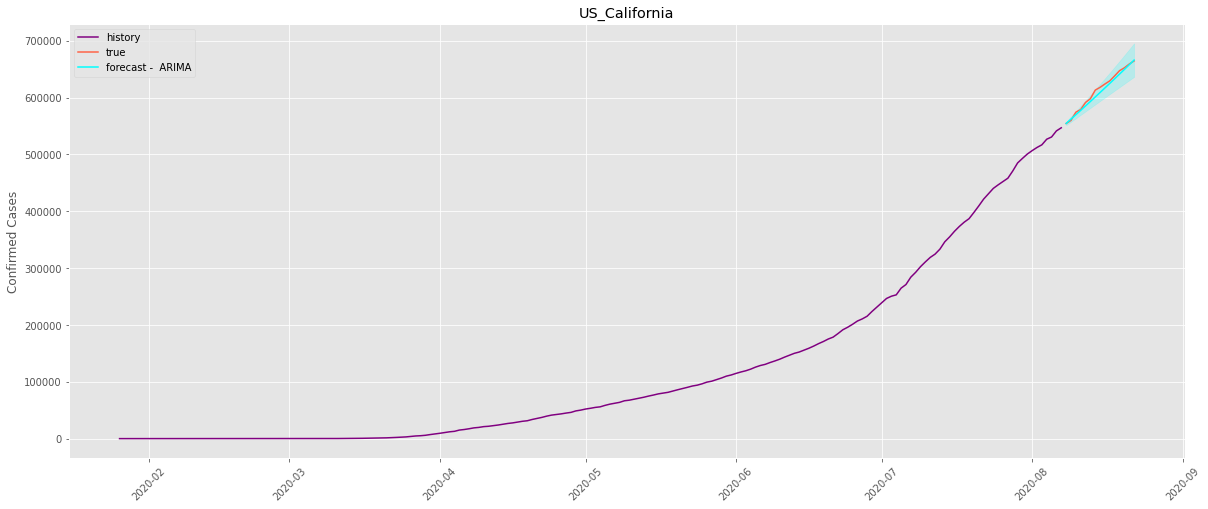

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('dark')
#plt.style.use('dark_background')
plt.style.use('ggplot')

plt.figure(figsize=(20,8))
info_train = covid19_train[(covid19_train['province_state'] == state)]
plt.plot(info_train['date'], info_train['confirmed'], label='history', color='purple')
info_val = covid19_val[(covid19_val['province_state'] == state)]
plt.plot(info_val['date'], info_val['confirmed'], label='true', color='tomato')
info_pred = y_arima[(y_arima['province_state'] == state)]
plt.plot(info_pred['date'], info_pred['confirmed'], label='forecast -  ARIMA', color='cyan')
info_pred_lower = y_arima_lower[(y_arima_lower['province_state'] == state)]
info_pred_upper = y_arima_upper[(y_arima_upper['province_state'] == state)]
plt.fill_between(x=info_val['date'], y1=info_pred_lower['confirmed'], y2=info_pred_upper['confirmed'], color='cyan', alpha=0.2)
plt.title('{}_{}'.format('US',state))
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

In [ ]:
for state in covid19_train['province_state'].unique():
    print(state)

 Norfolk County, MA
Alabama
Alameda County, CA
Alaska
American Samoa
Arizona
Arkansas
Ashland, NE
Bennington County, VT
Bergen County, NJ
Berkeley, CA
Berkshire County, MA
Boston, MA
Broward County, FL
California
Carver County, MN
Charleston County, SC
Charlotte County, FL
Chatham County, NC
Cherokee County, GA
Chicago
Chicago, IL
Clark County, NV
Clark County, WA
Cobb County, GA
Collin County, TX
Colorado
Connecticut
Contra Costa County, CA
Cook County, IL
Davidson County, TN
Davis County, UT
Delaware
Delaware County, PA
Denver County, CO
Diamond Princess
District of Columbia
Douglas County, CO
Douglas County, NE
Douglas County, OR
El Paso County, CO
Fairfax County, VA
Fairfield County, CT
Fayette County, KY
Florida
Floyd County, GA
Fort Bend County, TX
Fresno County, CA
Fulton County, GA
Georgia
Grafton County, NH
Grand Princess
Grand Princess Cruise Ship
Grant County, WA
Guam
Harford County, MD
Harris County, TX
Harrison County, KY
Hawaii
Hendricks County, IN
Hillsborough, FL
Honolu

## Saving dataframe back to BigQuery

In [ ]:
output_dataset_id = 'covid_demo'

output_table_id = 'covid_demo_info' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))


Dataset cmpelkk.covid_demo doesn't exist, so creating it



In [ ]:
#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

census
covid_demo
heartRateData
iottest
weatherData


In [ ]:
y_arima_df = y_arima[['province_state','date','confirmed', 'deaths']]
y_arima_df.head(30)

province_state       date  confirmed  deaths
77         Alabama 2020-05-24    14478.0   551.0
78         Alabama 2020-05-25    14986.0   566.0
79         Alabama 2020-05-26    15650.0   580.0
80         Alabama 2020-05-27    16032.0   583.0
81         Alabama 2020-05-28    16530.0   591.0
82         Alabama 2020-05-29    17031.0   610.0
83         Alabama 2020-05-30    17359.0   618.0
84         Alabama 2020-05-31    17952.0   630.0
85         Alabama 2020-06-01    18630.0   646.0
86         Alabama 2020-06-02    18766.0   653.0
87         Alabama 2020-06-03    18851.0   653.0
88         Alabama 2020-06-04    19072.0   653.0
89         Alabama 2020-06-05    19387.0   676.0
90         Alabama 2020-06-06    20043.0   689.0
91         Alabama 2020-06-07    20500.0   692.0
169         Alaska 2020-05-24      407.0    10.0
170         Alaska 2020-05-25      408.0    10.0
171         Alaska 2020-05-26      410.0    10.0
172         Alaska 2020-05-27      411.0    10.0
173         Alaska 2020-05-28      424.0    10.0
174         Alaska 2020-05-29      429.0    10.0
175         Alaska 2020-05-30      433.0    10.0
176         Alaska 2020-05-31      459.0    10.0
177         Alaska 2020-06-01      466.0    10.0
178         Alaska 2020-06-02      486.0    10.0
179         Alaska 2020-06-03      504.0    10.0
180         Alaska 2020-06-04      512.0    10.0
181         Alaska 2020-06-05      523.0    10.0
182         Alaska 2020-06-06      535.0    10.0
183         Alaska 2020-06-07      543.0    10.0

In [ ]:
job_config = bigquery.LoadJobConfig()

# Modify job config depending on if we want to replace or append to table
if(replace_or_append_output == 'replace'):
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
else:  
 job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

dataset_ref = client.dataset(output_dataset_id)
table_ref = dataset_ref.table(output_table_id)

# Use client functionality to load BigQuery table from Pandas data frame
client.load_table_from_dataframe(
 dataframe = y_arima_df,
 destination = table_ref,
 job_config = job_config
 ).result()
 
print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')

/usr/local/lib/python3.6/dist-packages/google/cloud/bigquery/_pandas_helpers.py:275: UserWarning:

Unable to determine type of column 'province_state'.



Write to bigquery dataset (replace) to cmpelkk.covid_demo.covid_demo_info



In [ ]:
#access our own dataset
sql = """
SELECT
    *
FROM
    `cmpelkk.covid_demo.covid_demo_info`
"""
dfmycovidquery = client.query(sql)
dfmycovid=dfmycovidquery.to_dataframe()
dfmycovid.head()

province_state                      date  ...  deaths  __index_level_0__
0        Alabama 2020-05-24 00:00:00+00:00  ...   551.0                 77
1        Alabama 2020-05-25 00:00:00+00:00  ...   566.0                 78
2        Alabama 2020-05-26 00:00:00+00:00  ...   580.0                 79
3        Alabama 2020-05-27 00:00:00+00:00  ...   583.0                 80
4        Alabama 2020-05-28 00:00:00+00:00  ...   591.0                 81

[5 rows x 5 columns]

In [ ]:
dfmycovid

province_state                      date  ...  deaths  __index_level_0__
0          Alabama 2020-05-24 00:00:00+00:00  ...   551.0                 77
1          Alabama 2020-05-25 00:00:00+00:00  ...   566.0                 78
2          Alabama 2020-05-26 00:00:00+00:00  ...   580.0                 79
3          Alabama 2020-05-27 00:00:00+00:00  ...   583.0                 80
4          Alabama 2020-05-28 00:00:00+00:00  ...   591.0                 81
..             ...                       ...  ...     ...                ...
865        Wyoming 2020-06-03 00:00:00+00:00  ...    17.0               6083
866        Wyoming 2020-06-04 00:00:00+00:00  ...    17.0               6084
867        Wyoming 2020-06-05 00:00:00+00:00  ...    17.0               6085
868        Wyoming 2020-06-06 00:00:00+00:00  ...    17.0               6086
869        Wyoming 2020-06-07 00:00:00+00:00  ...    17.0               6087

[870 rows x 5 columns]

# Weather

Use BigQuery via magics: The google.cloud.bigquery library also includes a magic command which runs a query and either displays the result or saves it to a variable as a DataFrame.

In [ ]:
%%bigquery weather_JFK --project cmpelkk
SELECT
  *
FROM
    `bigquery-public-data.noaa_gsod.gsod2019`
WHERE
  stn="744860"   -- JFK

In [ ]:
weather_JFK

stn   wban  year  mo  ... snow_ice_pellets  hail  thunder  tornado_funnel_cloud
0    744860  94789  2019  01  ...                0     0        0                     0
1    744860  94789  2019  12  ...                1     0        0                     0
2    744860  94789  2019  07  ...                0     0        1                     0
3    744860  94789  2019  05  ...                0     0        1                     0
4    744860  94789  2019  10  ...                0     0        0                     0
..      ...    ...   ...  ..  ...              ...   ...      ...                   ...
360  744860  94789  2019  10  ...                0     0        0                     0
361  744860  94789  2019  10  ...                0     0        0                     0
362  744860  94789  2019  02  ...                0     0        0                     0
363  744860  94789  2019  03  ...                0     0        0                     0
364  744860  94789  2019  10  ...                0     0        0                     0

[365 rows x 32 columns]

In [ ]:
%%bigquery weather_JFK_filtered --project cmpelkk
SELECT
  -- Create a timestamp from the date components.
  timestamp(concat(year,"-",mo,"-",da)) as timestamp,
  -- Replace numerical null values with actual nulls
  AVG(IF (temp=9999.9, null, temp)) AS temperature,
  AVG(IF (visib=999.9, null, visib)) AS visibility,
  AVG(IF (wdsp="999.9", null, CAST(wdsp AS Float64))) AS wind_speed,
  AVG(IF (gust=999.9, null, gust)) AS wind_gust,
  AVG(IF (prcp=99.99, null, prcp)) AS precipitation,
  AVG(IF (sndp=999.9, null, sndp)) AS snow_depth
FROM
  `bigquery-public-data.noaa_gsod.gsod20*`
WHERE
  CAST(YEAR AS INT64) > 2018
  AND stn="744860"    -- JFK
GROUP BY timestamp

In [ ]:
weather_JFK_filtered

timestamp  temperature  ...  precipitation  snow_depth
0   2020-01-01 00:00:00+00:00         39.8  ...           0.00         NaN
1   2020-02-19 00:00:00+00:00         45.0  ...           0.00         NaN
2   2020-02-23 00:00:00+00:00         41.6  ...           0.00         NaN
3   2020-03-11 00:00:00+00:00         51.2  ...           0.00         NaN
4   2020-03-26 00:00:00+00:00         43.7  ...           0.00         NaN
..                        ...          ...  ...            ...         ...
516 2019-12-08 00:00:00+00:00         32.5  ...           0.00         NaN
517 2019-07-13 00:00:00+00:00         78.5  ...           0.00         NaN
518 2019-07-27 00:00:00+00:00         76.5  ...           0.00         NaN
519 2019-04-16 00:00:00+00:00         52.2  ...           0.15         NaN
520 2019-10-17 00:00:00+00:00         56.2  ...           1.02         NaN

[521 rows x 7 columns]

724940 23234 SAN FRANCISCO INTERNATIONAL A ref: https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.txt

In [ ]:
#@title Get Daily Temperature Data for SFO Station (2019)
%%bigquery SFO_daily_2019 --project cmpelkk

SELECT
  # Station information
  daily_weather.stn AS usaf,
  
  # Convert year/month/day info into date
  DATE(
    CAST(daily_weather.year AS INT64),
    CAST(daily_weather.mo AS INT64),
    CAST(daily_weather.da AS INT64)
    ) AS date,
  
  daily_weather.temp AS avg_temp,
  daily_weather.count_temp AS n_for_avg_temp,
  
  daily_weather.max AS max_temp,
  daily_weather.flag_max AS max_temp_flag,
  
  daily_weather.min AS min_temp,
  daily_weather.flag_min AS min_temp_flag

FROM
  `bigquery-public-data.noaa_gsod.gsod2019` daily_weather

WHERE 
  # Filter to only chosen station
  daily_weather.stn = "724940" AND
  # Remove days w/ missing temps coded as 99999.9 (can throw off calculations)
  daily_weather.temp != 9999.9 AND
  daily_weather.max != 9999.9 AND
  daily_weather.min != 9999.9

ORDER BY
  date DESC

In [ ]:
SFO_daily_2019

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
0    724940  2019-12-31      50.2  ...           None      41.0          None
1    724940  2019-12-30      51.8  ...           None      46.9          None
2    724940  2019-12-29      53.0  ...           None      39.9          None
3    724940  2019-12-28      49.1  ...           None      39.0          None
4    724940  2019-12-27      49.1  ...           None      39.0          None
..      ...         ...       ...  ...            ...       ...           ...
360  724940  2019-01-05      53.1  ...           None      39.0          None
361  724940  2019-01-04      46.8  ...           None      39.0          None
362  724940  2019-01-03      46.2  ...           None      37.9          None
363  724940  2019-01-02      46.3  ...           None      37.9          None
364  724940  2019-01-01      50.5  ...           None      44.1          None

[365 rows x 8 columns]

In [ ]:
# 10 highest avg_temp samples
SFO_daily_2019.sort_values('avg_temp', ascending=False).head(10)

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
203  724940  2019-06-11      79.0  ...           None      66.9          None
204  724940  2019-06-10      78.1  ...           None      55.0          None
97   724940  2019-09-25      77.7  ...           None      61.0          None
202  724940  2019-06-12      76.9  ...           None      66.9          None
96   724940  2019-09-26      74.5  ...           None      64.0          None
109  724940  2019-09-13      74.4  ...           None      61.0          None
68   724940  2019-10-24      73.6  ...           None      55.0          None
138  724940  2019-08-15      73.0  ...           None      61.0          None
98   724940  2019-09-24      72.3  ...           None      57.9          None
205  724940  2019-06-09      72.1  ...           None      52.0          None

[10 rows x 8 columns]

In [ ]:
import pandas as pd

# Create table of temperature series to plot, with names, symbols, colors
daily_temp_plot_fields = pd.DataFrame.from_records(  
  columns = ['field_name', 'plot_label', 'marker_symbol', 'line_color', 
    'plot_mode'],
  data = [
    ('avg_temp', 'Avg', 'circle', None, 'markers'),
    ('max_temp', 'Max', 'triangle-up', None, 'markers'),
    ('min_temp', 'Min', 'triangle-down', None, 'markers')
    ]
  )

In [ ]:
daily_temp_plot_fields

field_name plot_label  marker_symbol line_color plot_mode
0   avg_temp        Avg         circle       None   markers
1   max_temp        Max    triangle-up       None   markers
2   min_temp        Min  triangle-down       None   markers

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Create function to plot single station daily temperature
def plot_single_station_daily_temp(daily_temp_data, plot_fields, station_name):
  daily_plot_data = []

  for index, row in plot_fields.iterrows():
    daily_plot_data = (daily_plot_data +
      [go.Scatter(
        x = daily_temp_data['date'],
        y = daily_temp_data[row['field_name']],
        name = row['plot_label'],
        marker = dict(
          # Constant color scale for plotting temp to use for all stations
          cmin = -22, # -22°F corresponds to -30°C (very cold, to most)
          cmax = 122, # 122°F corresponds to 50°C (very hot, to most)
          color = daily_temp_data[row['field_name']], 
          # colorscale = 'BlueReds',
          colorscale = [[0, 'rgb(0, 0, 230)'], [0.5, 'rgb(190, 190, 190)'],
            [1, 'rgb(230, 0, 0)']],
          symbol = row['marker_symbol']
          ),
        line = dict(
          color = row['line_color']
          ),
        mode = row['plot_mode']
        )]
      )

  daily_plot_layout = go.Layout(
    title = dict(
      text = (station_name + ' Daily Temperature'),
      xref = "paper", 
      x = 0.5
      ),
    yaxis = dict(title = 'Temperature (°F)')
    )

  pio.show(go.Figure(daily_plot_data, daily_plot_layout))

In [ ]:
chosen_station_name="SFO"
plot_single_station_daily_temp(SFO_daily_2019,
  daily_temp_plot_fields, chosen_station_name)

## Multi-Year data for SFO

In [ ]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'cmpelkk'
client = bigquery.Client(project=project_id)

In [ ]:
import numpy as np

#@title Get and Plot Multi-Year Daily Temperature Data for Chosen Station
chosen_start_year = 2005 #@param{type:"integer"}

chosen_end_year = 2019 #@param{type:"integer"}

def get_single_station_daily_temp_multiple_yrs(station_usaf, start_year, 
  end_year):
  
  single_station_daily_weather_multiyear_union_sql = ("\nUNION ALL\n".
    join([('''
      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod{year}`
      WHERE stn = '{station_usaf}')
      ''')
    .format(year = year, station_usaf = station_usaf)
       for year in np.arange(start_year, (end_year + 1))
    ]))

  single_station_daily_multiyear_sql = '''
    WITH
    daily_weather AS
    (
      {daily_weather_table}
    )

    SELECT
      daily_weather.stn AS usaf,
      
      # Convert year/month/day info into date
      DATE(
        CAST(daily_weather.year AS INT64),
        CAST(daily_weather.mo AS INT64),
        CAST(daily_weather.da AS INT64)
        ) AS date,
      
      daily_weather.temp AS avg_temp,
      daily_weather.count_temp AS n_for_avg_temp,
      
      daily_weather.max AS max_temp,
      daily_weather.flag_max AS max_temp_flag,
      
      daily_weather.min AS min_temp,
      daily_weather.flag_min AS min_temp_flag

    FROM
      daily_weather
    
    WHERE 
      # Remove days w/ missing temps coded as 99999.9 (can throw off calcs)
      daily_weather.temp != 9999.9 AND
      daily_weather.max != 9999.9 AND
      daily_weather.min != 9999.9

    ORDER BY
      date DESC
    '''

  single_station_daily_multiyear_query = (single_station_daily_multiyear_sql.
    format(
      daily_weather_table = single_station_daily_weather_multiyear_union_sql,
      station_usaf = station_usaf
      )
    )
  return single_station_daily_multiyear_query

  # single_station_daily_multiyear_df = (client.
  #   query(single_station_daily_multiyear_query).
  #   to_pandas()
  #   )

  # return(single_station_daily_multiyear_df)

In [ ]:
chosen_station_usaf="724940" #SFO
chosen_station_daily_multiyear = get_single_station_daily_temp_multiple_yrs(
  chosen_station_usaf, chosen_start_year, chosen_end_year)

In [ ]:
chosen_station_daily_multiyear

"\n    WITH\n    daily_weather AS\n    (\n      \n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2005`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2006`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2007`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2008`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2009`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2010`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2011`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquery-public-data.noaa_gsod.gsod2012`\n      WHERE stn = '724940')\n      \nUNION ALL\n\n      ( SELECT * FROM `bigquer

In [ ]:
dfquery_SFO_multiyear = client.query(chosen_station_daily_multiyear)

In [ ]:
dfquery_SFO_multiyear

In [ ]:
df_query_SFO_multiyear=dfquery_SFO_multiyear.to_dataframe()

In [ ]:
df_query_SFO_multiyear

usaf        date  avg_temp  ...  max_temp_flag  min_temp min_temp_flag
0     724940  2019-12-31      50.2  ...           None      41.0          None
1     724940  2019-12-30      51.8  ...           None      46.9          None
2     724940  2019-12-29      53.0  ...           None      39.9          None
3     724940  2019-12-28      49.1  ...           None      39.0          None
4     724940  2019-12-27      49.1  ...           None      39.0          None
...      ...         ...       ...  ...            ...       ...           ...
5473  724940  2005-01-05      48.3  ...              *      43.0             *
5474  724940  2005-01-04      48.2  ...              *      42.8             *
5475  724940  2005-01-03      47.7  ...              *      44.6             *
5476  724940  2005-01-02      48.7  ...              *      46.9             *
5477  724940  2005-01-01      50.4  ...              *      46.0             *

[5478 rows x 8 columns]

In [ ]:
plot_single_station_daily_temp(df_query_SFO_multiyear, 
  daily_temp_plot_fields, chosen_station_name)

We use scipy's curve fit optimization method to estimate a sinusoidal model for the daily temperature at a given weather station. The functions are set up to run the optimization to fit 4 parameters - mean, amp (for amplitude), freq (frequency), and phase_shift - and return either those parameters or the estimated daily temperature values from the model for that station. This Stack Overflow post provides some more useful technical details on how to fit this type of curve using these Python libraries.

In [ ]:
import scipy.optimize

In [ ]:
# Describe sinusoidal model as function w/ parameters of interest
def sine_function(t, amp, freq, phase_shift, mean):
  return (amp * np.sin(freq * 2 * np.pi * (t - phase_shift)) + mean)

# Fit sinusoidal model to data, return either fit info or daily temp estimates
def fit_sine_curve_to_daily_temp_data(daily_temp_data, temp_field_name,
  return_value = 'sine curve fit info'):

  # Calculate total range of days in data
  daily_temp_data['days_since_start'] = (daily_temp_data['date'] - 
    min(daily_temp_data['date'])).dt.days

  # Starting point for mean is mean of temp in data set
  guess_mean = daily_temp_data[temp_field_name].mean()
  
  # Starting point for amplitude is half diff btw 1st & 99th %tiles of temp
  guess_amp = (daily_temp_data[temp_field_name].quantile(0.99) -
    daily_temp_data[temp_field_name].quantile(0.01)) / 2

  # Starting point for frequency is inverse of avg # of days in year
  guess_freq = 1/365.25
  
  # Starting point for phase shift is +80 days (into spring, in most cases)
  guess_phase_shift = 80

  # Use curve fit optimizer on data, w/ above guesses as starting points
  sine_curve_fit = scipy.optimize.curve_fit(
    f = sine_function,
    xdata = np.array(daily_temp_data['days_since_start']),
    ydata = np.array(daily_temp_data[temp_field_name]),
    p0 = [guess_amp, guess_freq, guess_phase_shift, guess_mean]
    )

  # Extract estimated parameters from curve fit  
  est_amp, est_freq, est_phase_shift, est_mean = sine_curve_fit[0]

  # Use sine function & parameters to get daily estimates of average temperature
  daily_temp_data['est_' + temp_field_name] = sine_function(
    daily_temp_data['days_since_start'],
    est_amp, est_freq, est_phase_shift, est_mean
    )
  
  # Calculate mean absolute error of estimates vs actual temperature
  curve_estimate_mean_abs_err = abs(
    daily_temp_data['est_' + temp_field_name] - daily_temp_data[temp_field_name]
    ).mean()

  # Create data frame of sine curve fit info
  sine_curve_fit_info_df = pd.DataFrame(data = [{
    ('est_amp_' + temp_field_name): est_amp,
    ('est_freq_' + temp_field_name): est_freq,
    ('est_phase_shift_' + temp_field_name): est_phase_shift,
    ('est_mean_' + temp_field_name): est_mean,
    ('est_range_' + temp_field_name): 2 * abs(est_amp),
    ('mae_fitted_' + temp_field_name): curve_estimate_mean_abs_err
    }])
  
  # Return either sine curve fit into or daily temp data w/ estimates
  if(return_value == 'sine curve fit info'):
    return(sine_curve_fit_info_df)

  elif(return_value == 'daily temp data with estimates'):
    return(daily_temp_data)

In [ ]:
# Use function to fit sine curve, get out daily temp estimates for given station
chosen_station_daily_temp_with_preds = fit_sine_curve_to_daily_temp_data(
  daily_temp_data = df_query_SFO_multiyear, 
  temp_field_name = 'avg_temp',
  return_value = 'daily temp data with estimates'
  )

In [ ]:
chosen_station_daily_temp_with_preds

In [ ]:
# Set up plot fields structure: points for actual temp, curve for estimated temp
daily_avg_and_estimate_plot_fields = pd.DataFrame.from_records(
  columns = ['field_name', 'plot_label', 'marker_symbol', 'line_color', 
    'plot_mode'],
  data = [
    ('avg_temp', 'Actual Avg', 'circle', None, 'markers'),
    ('est_avg_temp', 'Estimated Avg', None, 'purple', 'lines')
    ]
  )

# Use function to plot daily temperature with estimates for given station
plot_single_station_daily_temp(df_query_SFO_multiyear, 
  daily_avg_and_estimate_plot_fields, "SFO")